In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from collections import Counter

In [22]:
# Caminho para o arquivo CSV com texto pré-processado
cleaned_file_path = r"C:\Users\rebec\OneDrive\Documentos\tweets_cleaned.csv"

In [23]:
# Leitura do arquivo CSV com texto pré-processado
try:
    tweets_df = pd.read_csv(cleaned_file_path)
except FileNotFoundError:
    print(f"Erro: Arquivo '{cleaned_file_path}' não encontrado.")
    exit()

In [24]:
# Listas de palavras-chave para cada ideologia
populist_words = ['elite', 'people', 'corrupt', 'establishment', 'common', 'folk', 'masses', 'grassroots', 'voice', 'ordinary', 'citizen', 'democracy', 'power']
nativist_words = ['immigrant', 'foreign', 'border', 'nationalism', 'patriotism', 'culture', 'heritage', 'homeland', 'native', 'tradition', 'identity', 'sovereignty']
authoritarian_words = ['law', 'order', 'control', 'power', 'strong', 'leader', 'authority', 'force', 'security', 'discipline', 'rule', 'command', 'regime']

In [25]:
# Função para contar palavras-chave e retornar um Counter
def count_keywords(text, keywords):
    return Counter(word for word in text.lower().split() if word in keywords)

In [26]:
# Aplicação da contagem de palavras-chave para cada ideologia
tweets_df['Populist Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, populist_words))
tweets_df['Nativist Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, nativist_words))
tweets_df['Authoritarian Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, authoritarian_words))

In [27]:
# Top 10 palavras-chave por ideologia
top_n = 10
top_populist_words = Counter(tweets_df['Populist Words'].sum()).most_common(top_n)
top_nativist_words = Counter(tweets_df['Nativist Words'].sum()).most_common(top_n)
top_authoritarian_words = Counter(tweets_df['Authoritarian Words'].sum()).most_common(top_n)

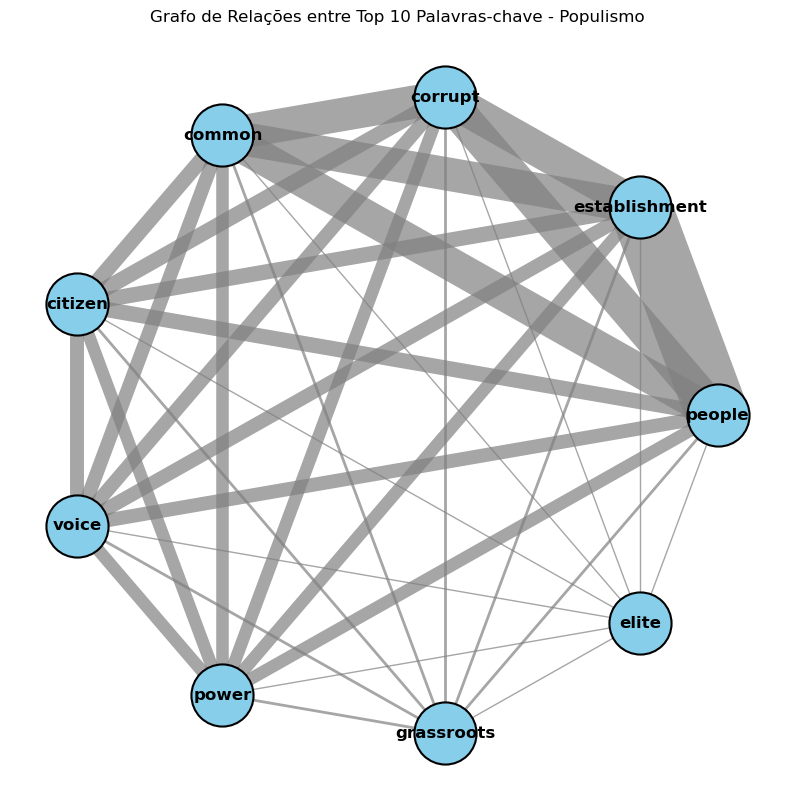

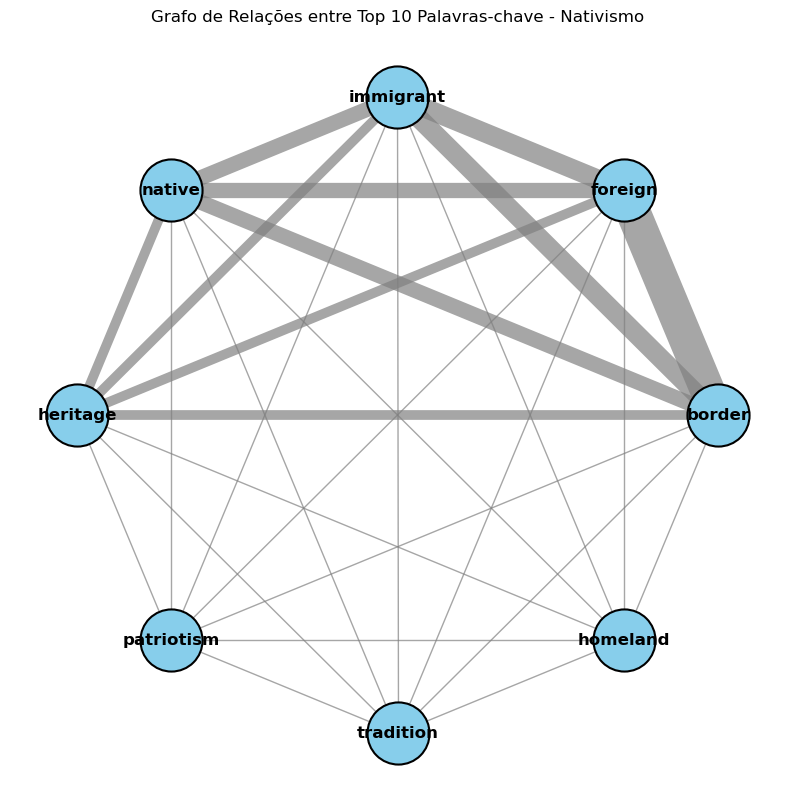

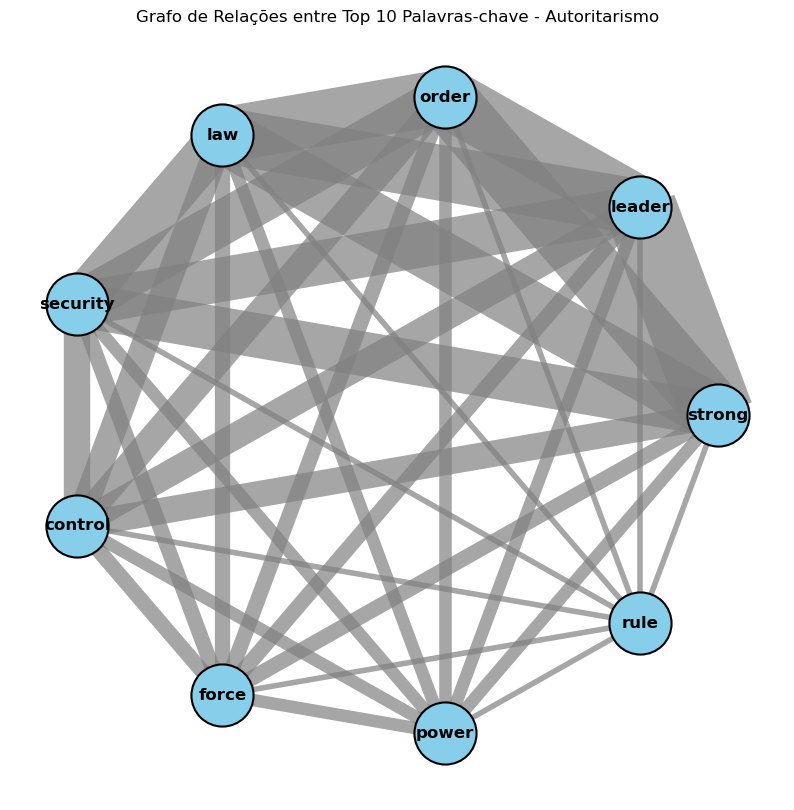

In [30]:
# Criar um grafo não direcionado para cada ideologia
ideologies = {
    'Populismo': top_populist_words,
    'Nativismo': top_nativist_words,
    'Autoritarismo': top_authoritarian_words
}

for ideology, top_words in ideologies.items():
    # Criar um grafo não direcionado
    G = nx.Graph()

    # Adicionar nós para as top 10 palavras-chave
    for word, count in top_words:
        G.add_node(word, count=count, ideology=ideology)

    # Adicionar arestas entre pares de palavras-chave com base na co-ocorrência
    for i in range(len(top_words)):
        for j in range(i + 1, len(top_words)):
            word1, count1 = top_words[i]
            word2, count2 = top_words[j]
            weight = min(count1, count2)  # Peso da aresta baseado na menor contagem
            G.add_edge(word1, word2, weight=weight)

    # Posicionar os nós usando um layout circular
    pos = nx.circular_layout(G)

    # Obter pesos das arestas
    edge_weights = nx.get_edge_attributes(G, 'weight').values()

    # Desenhar o grafo
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', edgecolors='black', linewidths=1.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=list(edge_weights), edge_color='gray', alpha=0.7)
    plt.title(f'Grafo de Relações entre Top {top_n} Palavras-chave - {ideology}')
    plt.axis('off')  # Desativar os eixos
    plt.show()